In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [10, 15]

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv('unit4.csv')

In [6]:
data_copy = data.copy()

In [7]:
# We will use data_copy to show the students some code that we have talked about earlier , just for recap

In [62]:
data.HOMEOWNR.value_counts()

H    49646
     21051
U    19872
Name: HOMEOWNR, dtype: int64

In [ ]:
def clean_gender_col(x):
    if x in ['',' ' ,'U', 'C', 'J', 'A']:
        return 'other'
    else:
        return x

In [64]:
data['GENDER'].apply(lambda x: 'other' if x in ['',' ' ,'U', 'C', 'J', 'A'] else x, inplace=True)

TypeError: <lambda>() got an unexpected keyword argument 'inplace'

In [60]:
data.drop(data[data.GENDER.isnull()].index)

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,,4803,XXXX,,F,S2,6.0,H,733,875,4,3,285,288,333,334,11390,,59,23,5,12,9702,L4D,24,3.0,3.375000
90565,AK,,0,XXXX,,M,C2,NaN,,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,9702,L1G,1,NaN,25.000000
90566,TX,,5001,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,9702,L1F,1,NaN,20.000000
90567,MI,,3801,XXXX,X,M,C3,NaN,,376,377,4,3,263,264,319,345,12178,,33,14,7,17,9702,L3E,7,3.0,8.285714


In [8]:
data.head(20)

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865
5,AL,,0,XXXX,,,T2,NaN,,807,899,3,3,364,410,406,454,15619,,35,15,6,12,9702,L1F,4,6.0,12.750000
6,IN,,6001,XXXX,,F,T2,4.0,H,484,519,3,3,251,284,278,311,10717,,63,26,4,9,9702,L1E,14,4.0,7.642857
7,LA,,0,XXXX,,F,T2,2.0,U,702,787,3,3,367,457,431,466,14248,,35,14,6,12,9702,L3E,5,6.0,6.200000
8,IA,,0,XXXX,,M,R2,3.0,U,234,288,2,1,226,266,280,323,11127,,70,29,6,12,9702,L1F,11,8.0,18.090909
9,TN,,3211,XXXX,,M,T1,NaN,,565,581,3,3,291,329,311,332,10517,,28,11,4,9,9702,L1F,3,7.0,9.333333


In [56]:
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, sequence[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.
    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the sequence in the calculation, and serves as a default when the
    sequence is empty.



In [57]:
map( np.sqrt, filter(lambda x: x % 2 == 1, lst))

In [59]:
from functools import reduce
lst = [0,1,2,3,4,5,6,7,8,9,10]
reduce(lambda a,b: a+b, map( np.sqrt, filter(lambda x: x % 2 == 1, lst)), 0)


10.613870096133258

In [9]:
from scipy.stats import chi2_contingency

data_crosstab = pd.crosstab(np.where(data['INCOME']>3,'HIGH_INCOME', 'LOW_INCOME'), data['GENDER'], margins = False)
chi2_contingency(data_crosstab, correction=False)

(2704.976526584617,
 0.0,
 6,
 array([[1.26907424e+03, 4.54051607e-01, 9.08103214e-01, 2.20977836e+04,
         1.52561340e+02, 1.68598443e+04, 7.42374378e+02],
        [1.52592576e+03, 5.45948393e-01, 1.09189679e+00, 2.65702164e+04,
         1.83438660e+02, 2.02721557e+04, 8.92625622e+02]]))

In [7]:
data.shape

(90569, 28)

In [8]:
# data.dtypes

In [9]:
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
7,INCOME,0.222847
26,TIMELAG,0.106582
0,STATE,0.000000
15,IC3,0.000000
25,NGIFTALL,0.000000
24,RFA_2,0.000000
23,MAXADATE,0.000000
22,NUMPRM12,0.000000
21,CARDPM12,0.000000
20,CARDPROM,0.000000


INCOME might be an important factor in predicting the gift value, so even though it has a lot of null values , we will not drop the column
In this exercise we will try a more precise method to replace the null values, instead of simply replacing them by a constant value, mean or median

We will use the same method for the column TIMELAG

Null values can be represented as either NaN, None, or NaT (this is usually used for datetime columns)

Note: It is not the best idea to use df.dropna() as it deletes the complete row whereever there is a null value

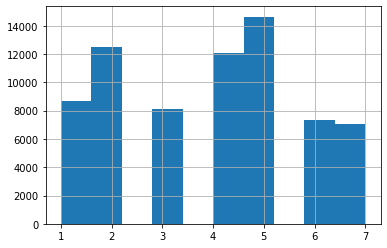

In [80]:
data['INCOME'].hist()

In [81]:
# Now lets choose a method to fill the null values 

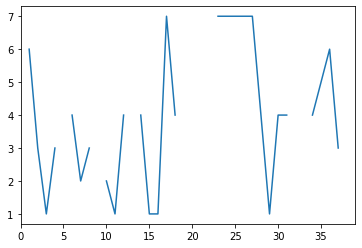

In [35]:
data['INCOME'][0:40].plot()

In [11]:
data['INCOME'].describe()

count    70386.000000
mean         3.878257
std          1.855265
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: INCOME, dtype: float64

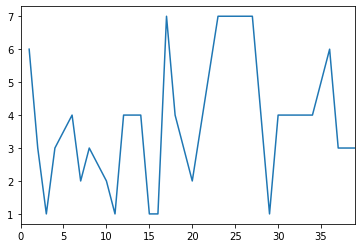

In [37]:
data['INCOME'][0:40].interpolate(method='linear').plot()

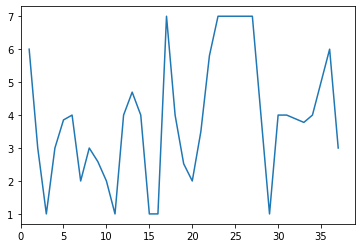

In [38]:
data['INCOME'][0:40].interpolate(method='akima').plot()

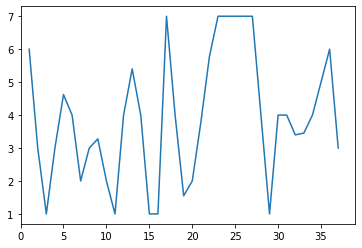

In [41]:
data['INCOME'][0:40].interpolate(method='polynomial', order=3).plot()

In [42]:
points = data['INCOME'].interpolate(method='akima')

In [48]:
points2 = data['INCOME'].fillna(np.mean(data['INCOME']))

In [58]:
np.median(data['INCOME'].fillna(0))

3.0

In [59]:
points3 = data['INCOME'].fillna(np.median(data['INCOME'].fillna(0)))

In [55]:
np.median(data['INCOME'])

3.8782570397522234

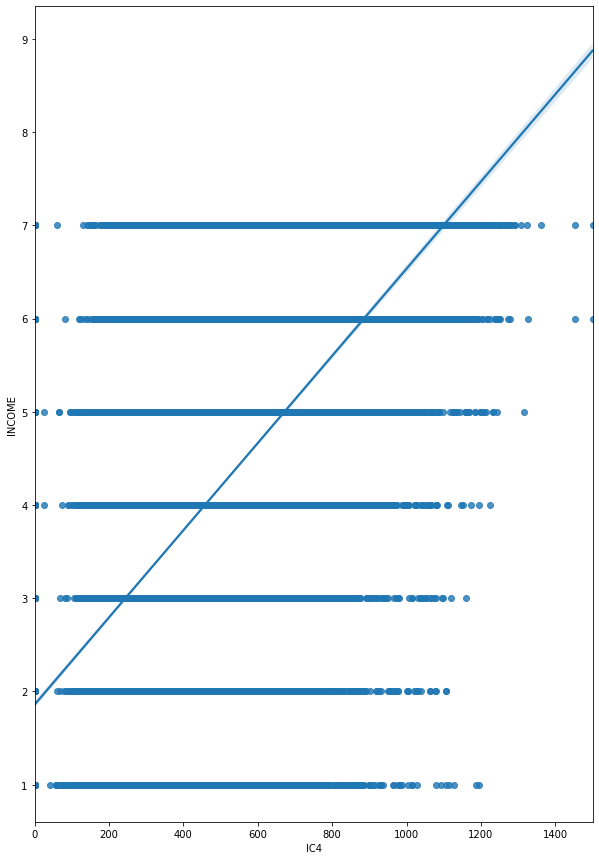

In [11]:
sns.regplot('IC4', 'INCOME', data=data)

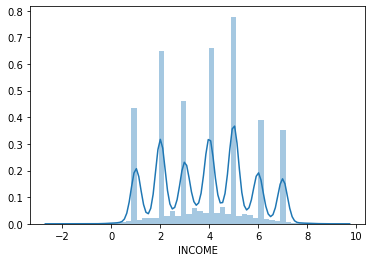

In [47]:
sns.distplot(points[1:])

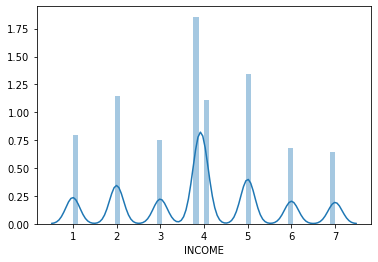

In [49]:
sns.distplot(points2)

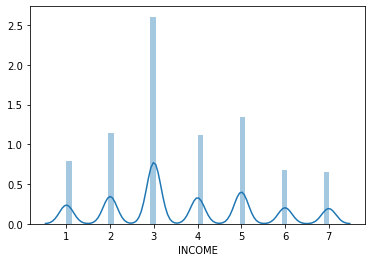

In [60]:
sns.distplot(points3)

In [103]:
data['INCOME'] = data['INCOME'].fillna(np.mean(data['INCOME']))

In [37]:
sum(data['TIMELAG'] ==0)

854

In [38]:
np.log(0)

-inf

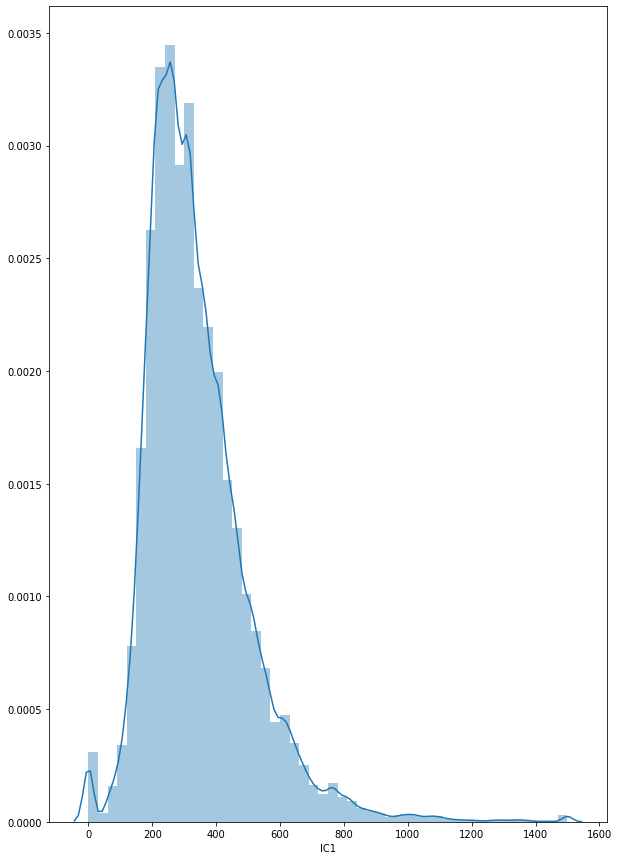

In [42]:
sns.distplot(data['IC1'])

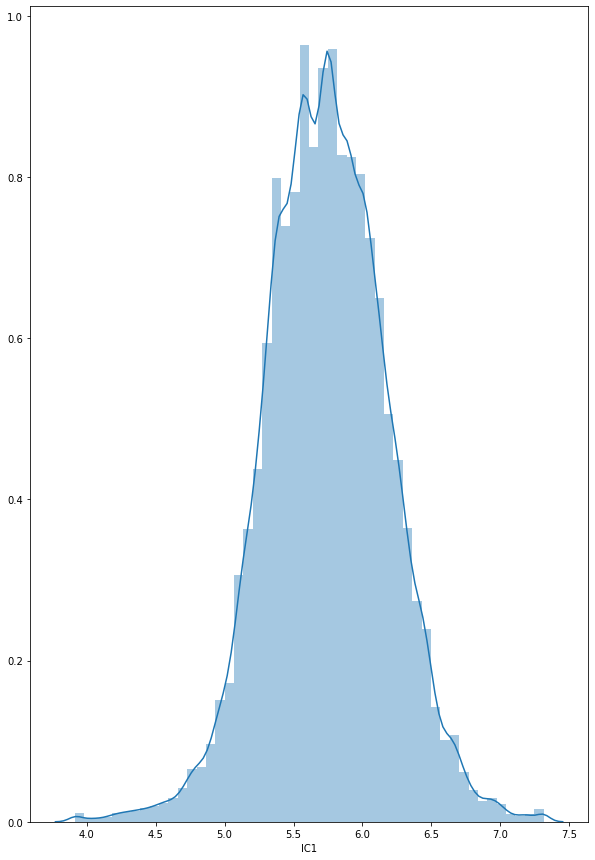

In [41]:
sns.distplot(np.log(data['IC1']))

In [44]:
iqr = np.percentile(data['TIMELAG'],75) - np.percentile(data['TIMELAG'],25)
upper_limit = np.percentile(data['TIMELAG'],75) + 1.5*iqr
print(upper_limit)


nan


In [47]:
points = list(filter(lambda x: x < 10000, data['TIMELAG']))
len(points)

80916

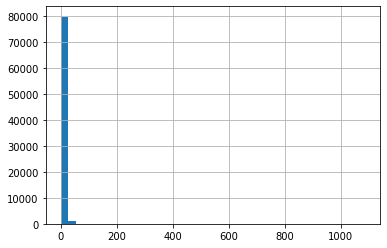

In [76]:
data['TIMELAG'].hist(bins=40)

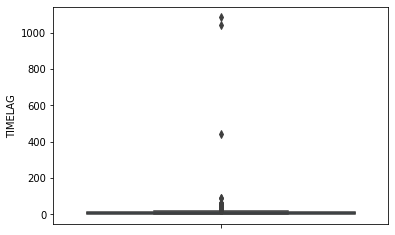

In [98]:
sns.boxplot(y=data['TIMELAG'])

In [ ]:
# Data in Timelag column is highly skewed (positive skewness)
# Removing outliers straight away might not be the best idea as it would remove a lot of data points from the data
# We will try some transformations 

In [77]:
data['TIMELAG'].describe()

count    80916.000000
mean         8.114378
std          8.310877
min          0.000000
25%          4.000000
50%          6.000000
75%         11.000000
max       1088.000000
Name: TIMELAG, dtype: float64

In [85]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

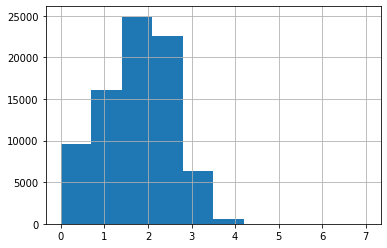

In [87]:
pd.Series(map(log_transfom_clean_, data['TIMELAG'])).hist()

In [89]:
pd.Series(map(log_transfom_clean_, data['TIMELAG'])).describe()

count    80062.000000
mean         1.826874
std          0.773448
min          0.000000
25%          1.386294
50%          1.945910
75%          2.397895
max          6.992096
dtype: float64

In [104]:
# data['TIMELAG'] = list(map(sqrt_transfom_clean_, data['TIMELAG']))

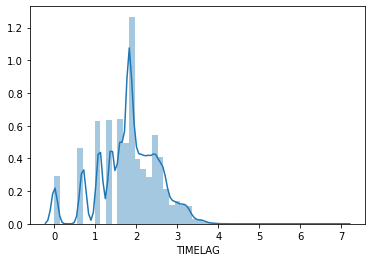

In [107]:
data['TIMELAG'] = list(map(log_transfom_clean_, data['TIMELAG']))
data['TIMELAG'] = data['TIMELAG'].fillna(np.mean(data['TIMELAG']))
sns.distplot(data['TIMELAG'])
plt.show()

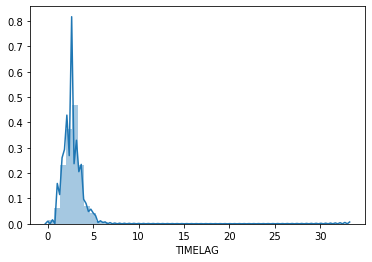

In [105]:
data['TIMELAG'] = data['TIMELAG'].fillna(np.mean(data['TIMELAG']))
sns.distplot(data['TIMELAG'])
plt.show()

In [93]:
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

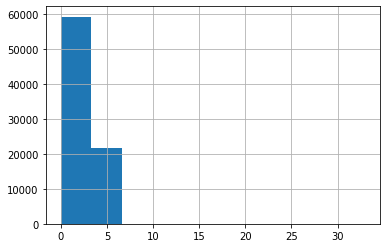

In [94]:
pd.Series(map(sqrt_transfom_clean_, data['TIMELAG'])).hist()

In [84]:
x = 2 
if x>0 and x<4:
    print(x)

2


In [61]:
numericals = data.select_dtypes(np.number)

In [62]:
numericals.head()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865


As you can see after using the head function, there are some null values in the columns , PVSTATE, RECP3, HOMEWNR, VETERANS. But they are not showing up in dataframe above. So there might be empty spaces there that we
would need to check and clean later


## Lesson 4

In [178]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [71]:
numericals = data.select_dtypes(np.number)

In [72]:
numericals.head()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865


In [73]:
data['INCOME'] = data['INCOME'].fillna(3.0)

In [74]:
data['TIMELAG'] = data['TIMELAG'].fillna(0.0)

In [75]:
data = data[data['AVGGIFT']<200]

In [76]:
data.INCOME

0        3.0
1        6.0
2        3.0
3        1.0
4        3.0
        ... 
90564    6.0
90565    3.0
90566    7.0
90567    3.0
90568    5.0
Name: INCOME, Length: 90543, dtype: float64

In [77]:
X_nulls = data[data.INCOME.isnull() ][['HV1', 'IC1']]

In [78]:
y = data[~data.INCOME.isnull()]['INCOME']
X = data[~data.INCOME.isnull() ][['HV1', 'IC1']]

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
model = LinearRegression().fit(X,y)
income_pred = model.predict(X_nulls)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [81]:
data[data.INCOME.isnull() ]['INCOME'] = np.round(income_pred)

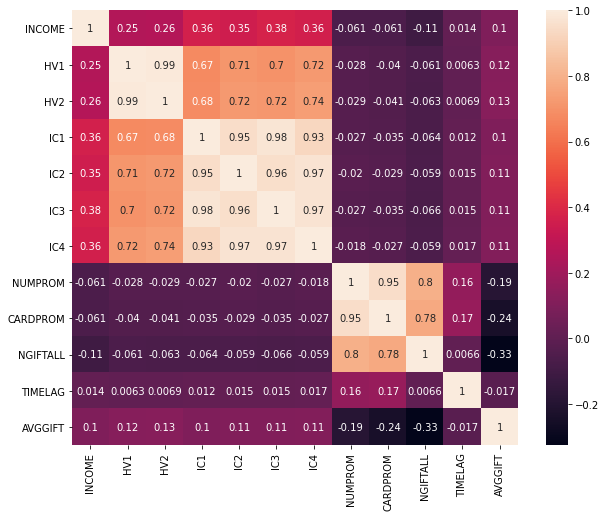

In [129]:
data_corr = data[['INCOME', 'HV1', 'HV2', 'IC1', 'IC2', 'IC3', 'IC4', 'NUMPROM', 'CARDPROM', 'NGIFTALL', 'TIMELAG', 'AVGGIFT']]
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

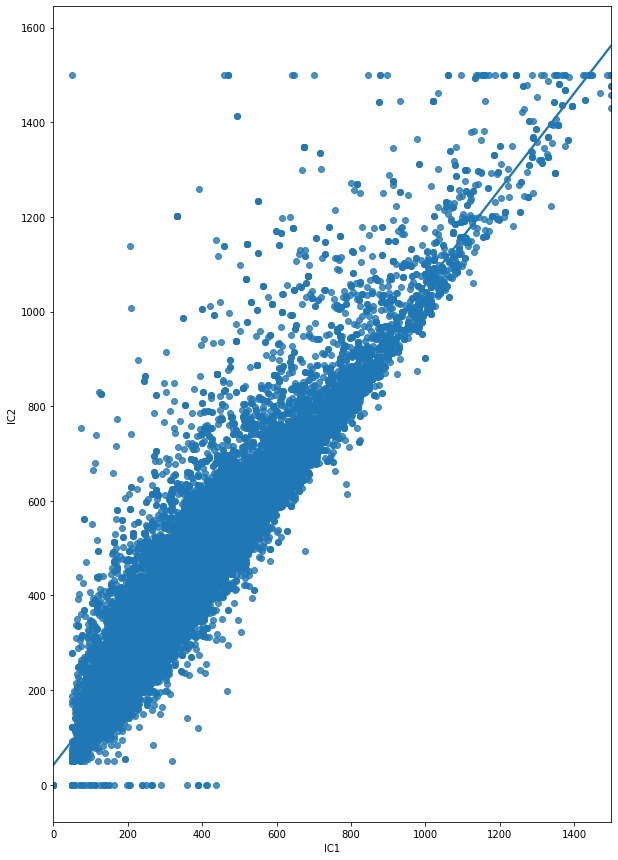

In [130]:
sns.regplot('IC1','IC2', data=data_corr)

In [125]:
model = LinearRegression().fit(data_corr[['HV1']], data_corr[['HV2']])
model.score(data_corr[['HV1']], data_corr[['HV2']])

0.9867393750294643

In [127]:
model = LinearRegression().fit(data_corr[['IC1']], data_corr[['IC2']])
model.score(data_corr[['IC1']], data_corr[['IC2']])

0.9046926432463182

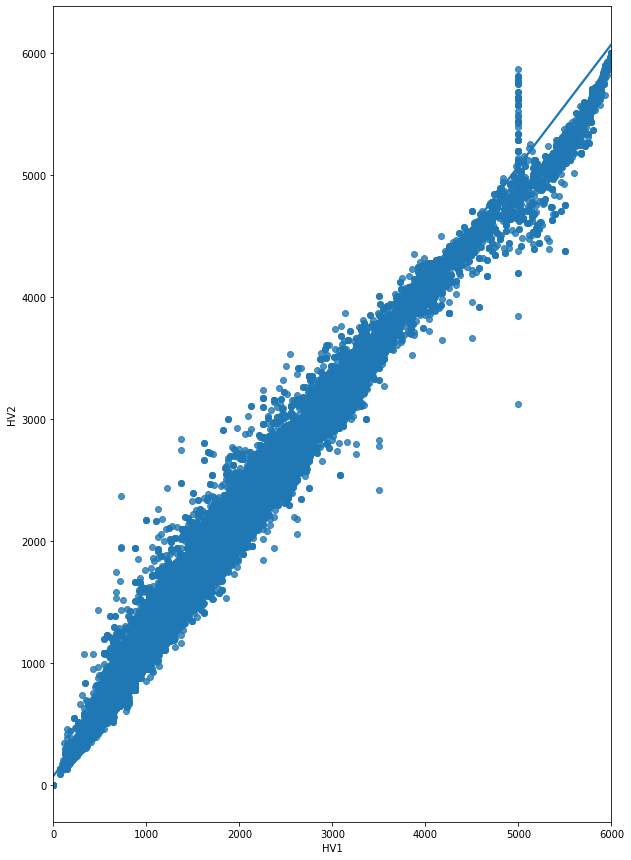

In [119]:
sns.regplot('HV1','HV2', data=data_corr)

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# This is the code to show how to use the __variance_inflation_factor__ function
vif = {}
for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value


In [84]:
vif

{'INCOME': 6.229340472998485,
 'HV1': 194.04294809334723,
 'HV2': 217.9645843166888,
 'IC1': 263.2114093898015,
 'IC2': 256.51308242233773,
 'IC3': 578.1560752208279,
 'IC4': 493.64589597431006,
 'NUMPROM': 60.38210849784127,
 'CARDPROM': 56.66553760324927,
 'NGIFTALL': 7.093771497848244,
 'TIMELAG': 1.905133353958784,
 'AVGGIFT': 3.5196012371714858}

In [85]:
[variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]

[6.229340472998485,
 194.04294809334723,
 217.9645843166888,
 263.2114093898015,
 256.51308242233773,
 578.1560752208279,
 493.64589597431006,
 60.38210849784127,
 56.66553760324927,
 7.093771497848244,
 1.905133353958784,
 3.5196012371714858]

In [131]:
flag = True
threshold = 50
while flag is True:
    #print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    #print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        flag = True

In [87]:
[variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]

[5.849435329982626,
 4.130833545572646,
 9.568641468225755,
 12.522926552233692,
 6.273645119891688,
 1.8959501816304056,
 3.237062388345784]

In [116]:
flag= True
while flag is True:
    flag = False
    for i in range(1, corr_matrix.shape[1]):
        if corr_matrix.iloc[i,range(i)].max() > 0.9:
            print(corr_matrix.columns[corr_matrix.iloc[i,range(i)].argmax()])
            col_name = corr_matrix.columns[corr_matrix.iloc[i,range(i)].argmax()]
            corr_matrix.drop([col_name], axis=1, inplace=True)
            corr_matrix.drop([col_name], inplace=True)
            display(corr_matrix)
            flag = True
            break

HV1


,INCOME,HV2,IC1,IC2,IC3,IC4,NUMPROM,CARDPROM,NGIFTALL,TIMELAG,AVGGIFT
INCOME,1.000000,0.263136,0.363987,0.352455,0.375721,0.362691,-0.060637,-0.060917,-0.106672,0.014226,0.100212
HV2,0.263136,1.000000,0.681608,0.721507,0.719192,0.740550,-0.028951,-0.040789,-0.062527,0.006893,0.127370
IC1,0.363987,0.681608,1.000000,0.951153,0.975347,0.929739,-0.027416,-0.035128,-0.063747,0.012451,0.103213
IC2,0.352455,0.721507,0.951153,1.000000,0.955152,0.973685,-0.020086,-0.028738,-0.058583,0.015017,0.108709
IC3,0.375721,0.719192,0.975347,0.955152,1.000000,0.971331,-0.026513,-0.034981,-0.065552,0.014740,0.106671
IC4,0.362691,0.740550,0.929739,0.973685,0.971331,1.000000,-0.018002,-0.027435,-0.058571,0.016502,0.109542
NUMPROM,-0.060637,-0.028951,-0.027416,-0.020086,-0.026513,-0.018002,1.000000,0.949642,0.795470,0.161136,-0.188827
CARDPROM,-0.060917,-0.040789,-0.035128,-0.028738,-0.034981,-0.027435,0.949642,1.000000,0.776600,0.173624,-0.240895
NGIFTALL,-0.106672,-0.062527,-0.063747,-0.058583,-0.065552,-0.058571,0.795470,0.776600,1.000000,0.006604,-0.325656
TIMELAG,0.014226,0.006893,0.012451,0.015017,0.014740,0.016502,0.161136,0.173624,0.006604,1.000000,-0.017055


IC1


,INCOME,HV2,IC2,IC3,IC4,NUMPROM,CARDPROM,NGIFTALL,TIMELAG,AVGGIFT
INCOME,1.000000,0.263136,0.352455,0.375721,0.362691,-0.060637,-0.060917,-0.106672,0.014226,0.100212
HV2,0.263136,1.000000,0.721507,0.719192,0.740550,-0.028951,-0.040789,-0.062527,0.006893,0.127370
IC2,0.352455,0.721507,1.000000,0.955152,0.973685,-0.020086,-0.028738,-0.058583,0.015017,0.108709
IC3,0.375721,0.719192,0.955152,1.000000,0.971331,-0.026513,-0.034981,-0.065552,0.014740,0.106671
IC4,0.362691,0.740550,0.973685,0.971331,1.000000,-0.018002,-0.027435,-0.058571,0.016502,0.109542
NUMPROM,-0.060637,-0.028951,-0.020086,-0.026513,-0.018002,1.000000,0.949642,0.795470,0.161136,-0.188827
CARDPROM,-0.060917,-0.040789,-0.028738,-0.034981,-0.027435,0.949642,1.000000,0.776600,0.173624,-0.240895
NGIFTALL,-0.106672,-0.062527,-0.058583,-0.065552,-0.058571,0.795470,0.776600,1.000000,0.006604,-0.325656
TIMELAG,0.014226,0.006893,0.015017,0.014740,0.016502,0.161136,0.173624,0.006604,1.000000,-0.017055
AVGGIFT,0.100212,0.127370,0.108709,0.106671,0.109542,-0.188827,-0.240895,-0.325656,-0.017055,1.000000


IC2


,INCOME,HV2,IC3,IC4,NUMPROM,CARDPROM,NGIFTALL,TIMELAG,AVGGIFT
INCOME,1.000000,0.263136,0.375721,0.362691,-0.060637,-0.060917,-0.106672,0.014226,0.100212
HV2,0.263136,1.000000,0.719192,0.740550,-0.028951,-0.040789,-0.062527,0.006893,0.127370
IC3,0.375721,0.719192,1.000000,0.971331,-0.026513,-0.034981,-0.065552,0.014740,0.106671
IC4,0.362691,0.740550,0.971331,1.000000,-0.018002,-0.027435,-0.058571,0.016502,0.109542
NUMPROM,-0.060637,-0.028951,-0.026513,-0.018002,1.000000,0.949642,0.795470,0.161136,-0.188827
CARDPROM,-0.060917,-0.040789,-0.034981,-0.027435,0.949642,1.000000,0.776600,0.173624,-0.240895
NGIFTALL,-0.106672,-0.062527,-0.065552,-0.058571,0.795470,0.776600,1.000000,0.006604,-0.325656
TIMELAG,0.014226,0.006893,0.014740,0.016502,0.161136,0.173624,0.006604,1.000000,-0.017055
AVGGIFT,0.100212,0.127370,0.106671,0.109542,-0.188827,-0.240895,-0.325656,-0.017055,1.000000


IC3


,INCOME,HV2,IC4,NUMPROM,CARDPROM,NGIFTALL,TIMELAG,AVGGIFT
INCOME,1.000000,0.263136,0.362691,-0.060637,-0.060917,-0.106672,0.014226,0.100212
HV2,0.263136,1.000000,0.740550,-0.028951,-0.040789,-0.062527,0.006893,0.127370
IC4,0.362691,0.740550,1.000000,-0.018002,-0.027435,-0.058571,0.016502,0.109542
NUMPROM,-0.060637,-0.028951,-0.018002,1.000000,0.949642,0.795470,0.161136,-0.188827
CARDPROM,-0.060917,-0.040789,-0.027435,0.949642,1.000000,0.776600,0.173624,-0.240895
NGIFTALL,-0.106672,-0.062527,-0.058571,0.795470,0.776600,1.000000,0.006604,-0.325656
TIMELAG,0.014226,0.006893,0.016502,0.161136,0.173624,0.006604,1.000000,-0.017055
AVGGIFT,0.100212,0.127370,0.109542,-0.188827,-0.240895,-0.325656,-0.017055,1.000000


NUMPROM


,INCOME,HV2,IC4,CARDPROM,NGIFTALL,TIMELAG,AVGGIFT
INCOME,1.000000,0.263136,0.362691,-0.060917,-0.106672,0.014226,0.100212
HV2,0.263136,1.000000,0.740550,-0.040789,-0.062527,0.006893,0.127370
IC4,0.362691,0.740550,1.000000,-0.027435,-0.058571,0.016502,0.109542
CARDPROM,-0.060917,-0.040789,-0.027435,1.000000,0.776600,0.173624,-0.240895
NGIFTALL,-0.106672,-0.062527,-0.058571,0.776600,1.000000,0.006604,-0.325656
TIMELAG,0.014226,0.006893,0.016502,0.173624,0.006604,1.000000,-0.017055
AVGGIFT,0.100212,0.127370,0.109542,-0.240895,-0.325656,-0.017055,1.000000


In [117]:
corr_matrix

,INCOME,HV2,IC4,CARDPROM,NGIFTALL,TIMELAG,AVGGIFT
INCOME,1.000000,0.263136,0.362691,-0.060917,-0.106672,0.014226,0.100212
HV2,0.263136,1.000000,0.740550,-0.040789,-0.062527,0.006893,0.127370
IC4,0.362691,0.740550,1.000000,-0.027435,-0.058571,0.016502,0.109542
CARDPROM,-0.060917,-0.040789,-0.027435,1.000000,0.776600,0.173624,-0.240895
NGIFTALL,-0.106672,-0.062527,-0.058571,0.776600,1.000000,0.006604,-0.325656
TIMELAG,0.014226,0.006893,0.016502,0.173624,0.006604,1.000000,-0.017055
AVGGIFT,0.100212,0.127370,0.109542,-0.240895,-0.325656,-0.017055,1.000000


In [89]:
for i in range(1, corr_matrix.shape[1]):
    corr_matrix[i,]

INCOME      1.0
HV1         1.0
HV2         1.0
IC1         1.0
IC2         1.0
IC3         1.0
IC4         1.0
NUMPROM     1.0
CARDPROM    1.0
NGIFTALL    1.0
TIMELAG     1.0
AVGGIFT     1.0
dtype: float64

In [ ]:
flag = True
threshold = 50
while flag is True:
    #print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    #print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        flag = True

In [237]:
data_corr.columns

Index(['INCOME', 'HV1', 'IC1', 'CARDPROM', 'NGIFTALL', 'TIMELAG', 'AVGGIFT'], dtype='object')

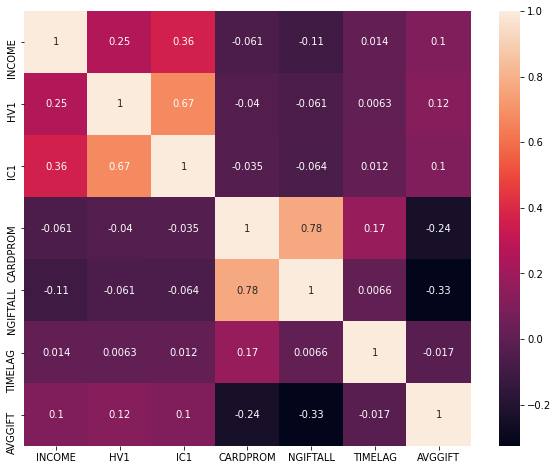

In [189]:
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

## Addressing categorical variables

In [132]:
categoricals = data.select_dtypes(np.object)

In [133]:
categoricals.head()

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,IL,,XXXX,,F,T2,,,L4E
1,CA,,XXXX,,M,S1,H,,L2G
2,NC,,XXXX,,M,R2,U,,L4E
3,CA,,XXXX,,F,R2,U,,L4E
4,FL,,XXXX,X,F,S2,H,,L2F


### Finding correlations in categorical data (chi-square)

In [134]:
data.DOMAIN.value_counts()

R2    13005
T2    11717
S1    10862
S2     8052
C2     7832
C1     5792
C3     5055
T1     4709
R3     4572
U1     4258
U2     3111
U3     2483
       2166
T3     2092
S3     1817
U4     1735
R1     1285
Name: DOMAIN, dtype: int64

In [135]:
data_crosstab = pd.crosstab(data['DOMAIN'], data['RFA_2'], margins = False) 
data_crosstab

RFA_2,L1E,L1F,L1G,L2E,L2F,L2G,L3D,L3E,L3F,L3G,L4D,L4E,L4F,L4G
DOMAIN,,,,,,,,,,,,,,
,155,595,276,134,248,126,61,169,95,32,98,92,50,35
C1,249,1842,925,283,689,328,114,421,230,113,210,219,108,61
C2,413,2415,1000,436,916,383,205,640,277,153,434,318,163,79
C3,300,1620,605,298,558,198,155,410,166,54,319,228,106,38
R1,62,419,185,52,157,72,26,113,52,24,50,37,24,12
R2,782,4041,1531,778,1472,597,397,1060,480,190,742,535,286,114
R3,311,1486,441,280,488,178,165,380,143,53,319,200,93,35
S1,410,3627,1880,411,1231,695,198,751,438,193,368,344,208,108
S2,396,2631,1014,401,995,312,184,673,332,126,383,346,191,68


In [136]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab, correction=False)
g, p, dof, expctd

(1393.9427974751684,
 1.7134393267462319e-174,
 208,
 array([[ 111.62161625,  698.69964547,  286.78095491,  111.98045128,
          248.74444187,  105.40180909,   54.231934  ,  173.29339651,
           80.18766774,   34.04148305,  106.4304695 ,   87.24475663,
           46.67247606,   20.66889765],
        [ 298.48217974, 1868.36027081,  766.86763195,  299.44172382,
          665.15595905,  281.85008228,  145.0190959 ,  463.39582298,
          214.42611798,   91.02874877,  284.60077532,  233.29715163,
          124.80470053,   55.26973924],
        [ 403.61057177, 2526.41533857, 1036.96603824,  404.90807683,
          899.43050263,  381.12048419,  196.09626365,  626.60844019,
          289.94912914,  123.08997935,  384.83999867,  315.46672852,
          168.76215721,   74.73629104],
        [ 260.50197144, 1630.62174878,  669.28796263,  261.33941884,
          580.51853815,  245.98621649,  126.56621716,  404.4312647 ,
          187.14157914,   79.44584341,  248.38689904,  203.61137802,

In [137]:
data = data.drop(['RFA_2'], axis=1)

In [138]:
data_crosstab2 = pd.crosstab(data['STATE'], data['DOMAIN'], margins = False) 
g, p, dof, expctd = chi2_contingency(data_crosstab, correction=False)
g, p, dof, expctd

(1393.9427974751684,
 1.7134393267462319e-174,
 208,
 array([[ 111.62161625,  698.69964547,  286.78095491,  111.98045128,
          248.74444187,  105.40180909,   54.231934  ,  173.29339651,
           80.18766774,   34.04148305,  106.4304695 ,   87.24475663,
           46.67247606,   20.66889765],
        [ 298.48217974, 1868.36027081,  766.86763195,  299.44172382,
          665.15595905,  281.85008228,  145.0190959 ,  463.39582298,
          214.42611798,   91.02874877,  284.60077532,  233.29715163,
          124.80470053,   55.26973924],
        [ 403.61057177, 2526.41533857, 1036.96603824,  404.90807683,
          899.43050263,  381.12048419,  196.09626365,  626.60844019,
          289.94912914,  123.08997935,  384.83999867,  315.46672852,
          168.76215721,   74.73629104],
        [ 260.50197144, 1630.62174878,  669.28796263,  261.33941884,
          580.51853815,  245.98621649,  126.56621716,  404.4312647 ,
          187.14157914,   79.44584341,  248.38689904,  203.61137802,

As you would see the **p-value** is 0 in this case also the p-value is smaller than 0.05 hence we reject the null hypothesis. Hence we can say that the variables are correlated to each other and drop one of the variables 


In [139]:
data = data.drop(['STATE'], axis=1)

## Transforming numerical data

In [140]:
data_corr.head()

,INCOME,HV1,IC1,CARDPROM,NGIFTALL,TIMELAG,AVGGIFT
0,3.0,479,307,27,31,4.0,7.741935
1,6.0,5468,1088,12,3,18.0,15.666667
2,3.0,497,251,26,27,12.0,7.481481
3,1.0,1000,386,27,16,9.0,6.812500
4,3.0,576,240,43,37,14.0,6.864865


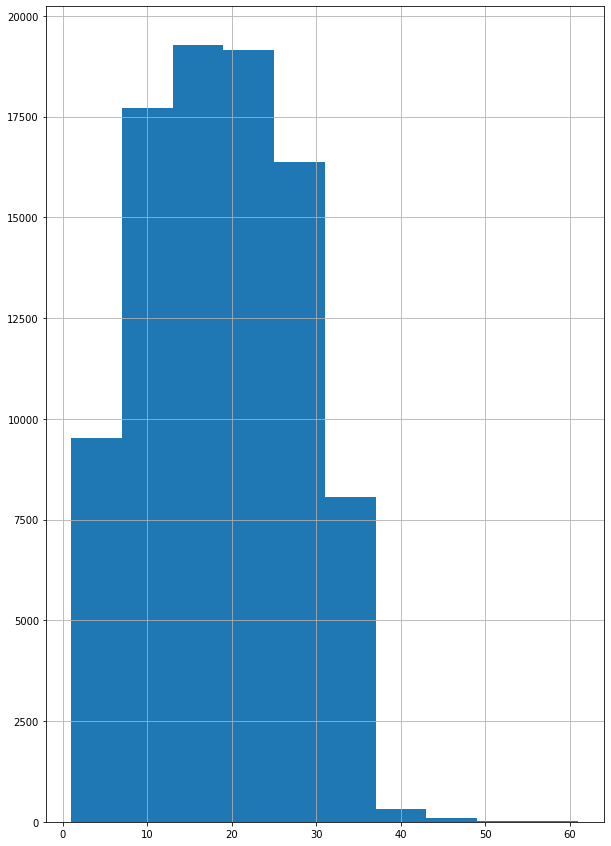

In [141]:
data_corr.CARDPROM.hist()

### We drop the target variable

In [142]:
numerical = data_corr.drop(['AVGGIFT'], axis=1)

In [143]:
X_num = numerical

## Standardization

In [144]:
X_num.describe()

,INCOME,HV1,IC1,CARDPROM,NGIFTALL,TIMELAG
count,90543.000000,90543.000000,90543.000000,90543.000000,90543.000000,90543.000000
mean,3.682560,1056.229073,339.346631,18.371536,9.502479,7.249914
std,1.675947,936.122622,162.356530,8.581881,8.495577,8.245494
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.000000,511.000000,230.000000,11.000000,3.000000,3.000000
50%,3.000000,734.000000,309.000000,18.000000,7.000000,6.000000
75%,5.000000,1206.000000,414.000000,25.000000,13.000000,10.000000
max,7.000000,6000.000000,1500.000000,61.000000,237.000000,1088.000000


In [145]:
# Standardization/Standard Scaler

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
x_standardized

array([[-0.40727037, -0.61662035, -0.19923319,  1.00543355,  2.53045078,
        -0.39414647],
       [ 1.38277257,  4.71283909,  4.61119429, -0.74244458, -0.7654001 ,
         1.30375997],
       [-0.40727037, -0.597392  , -0.54415501,  0.88890834,  2.05961494,
         0.57608578],
       ...,
       [ 1.97945355,  0.66527007,  2.87426657, -1.67464626, -1.00081802,
        -0.8792626 ],
       [-0.40727037, -0.72664928, -0.47024319, -0.50939417, -0.29456426,
        -0.5154255 ],
       [ 0.78609159, -0.12629726,  0.68770862,  1.5880596 ,  3.47212246,
        -0.15158841]])

### Scaling

In [146]:
# Min max scaler

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_num)
x_min_max = transformer.transform(X_num)
x_min_max

array([[0.33333333, 0.07983333, 0.20466667, 0.43333333, 0.12711864,
        0.00367647],
       [0.83333333, 0.91133333, 0.72533333, 0.18333333, 0.00847458,
        0.01654412],
       [0.33333333, 0.08283333, 0.16733333, 0.41666667, 0.11016949,
        0.01102941],
       ...,
       [1.        , 0.27983333, 0.53733333, 0.05      , 0.        ,
        0.        ],
       [0.33333333, 0.06266667, 0.17533333, 0.21666667, 0.02542373,
        0.00275735],
       [0.66666667, 0.15633333, 0.30066667, 0.51666667, 0.16101695,
        0.00551471]])

### Normalization

In [147]:
# Normalization

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
x_normalized

array([[5.25907233e-03, 8.39698549e-01, 5.38178402e-01, 4.73316510e-02,
        5.43437474e-02, 7.01209644e-03],
       [1.07618720e-03, 9.80765270e-01, 1.95148613e-01, 2.15237440e-03,
        5.38093601e-04, 3.22856161e-03],
       [5.37458371e-03, 8.90389368e-01, 4.49673504e-01, 4.65797255e-02,
        4.83712534e-02, 2.14983348e-02],
       ...,
       [3.75847770e-03, 9.01497723e-01, 4.32761861e-01, 2.14770154e-03,
        5.36925386e-04, 0.00000000e+00],
       [6.53397864e-03, 8.18925323e-01, 5.72812128e-01, 3.04919003e-02,
        1.52459502e-02, 6.53397864e-03],
       [4.79827226e-03, 9.00155875e-01, 4.32804158e-01, 3.07089424e-02,
        3.74265236e-02, 5.75792671e-03]])

In [148]:
np.linalg.norm(x_normalized[4,])

0.9999999999999999

Text(0.5, 1.0, 'HV1 (Normalized)')

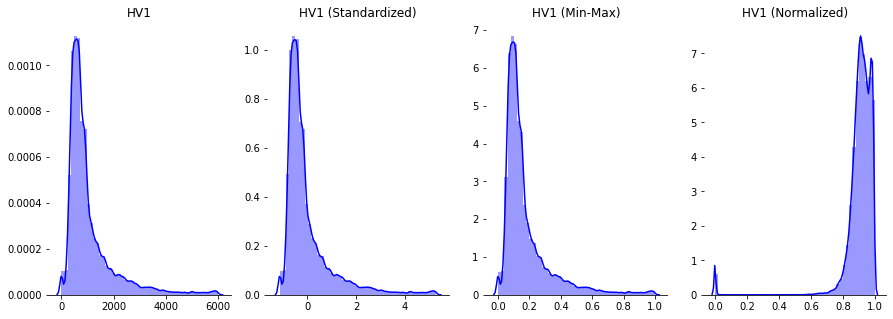

In [149]:
# Set up the matplotlib figure

f, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=False)
sns.despine(left=True)

col = 1
sns.distplot(X_num.values[:,col], kde=True, color="b", ax=axes[0])
sns.distplot(x_standardized[:,col], kde=True, color="b", ax=axes[1])
sns.distplot(x_min_max[:,col], kde=True, color="b", ax=axes[2])
sns.distplot(x_normalized[:,col], kde=True, color="b", ax=axes[3])

axes[0].set_title(f'{X_num.columns[col]}')
axes[1].set_title(f'{X_num.columns[col]} (Standardized)')
axes[2].set_title(f'{X_num.columns[col]} (Min-Max)')
axes[3].set_title(f'{X_num.columns[col]} (Normalized)')

### Dealing with columns with too many values

In [150]:
vals_domain = pd.DataFrame(data['DOMAIN'].value_counts())
vals_domain = vals_domain.reset_index()
vals_domain.columns = ['domain', 'counts']

In [151]:
vals_domain

,domain,counts
0,R2,13005
1,T2,11717
2,S1,10862
3,S2,8052
4,C2,7832
5,C1,5792
6,C3,5055
7,T1,4709
8,R3,4572
9,U1,4258


In [152]:
group_vals_domain_df = vals_domain[vals_domain['counts']<5000]
group_vals_domain = list(group_vals_domain_df['domain'])
group_vals_domain

['T1', 'R3', 'U1', 'U2', 'U3', ' ', 'T3', 'S3', 'U4', 'R1']

In [153]:
def clean_vals_domain(x):
    if x in group_vals_domain:
        return 'other'
    else:
        return x

data['DOMAIN'] = list(map(clean_vals_domain, data['DOMAIN']))

In [154]:
data['DOMAIN'].value_counts()

other    28228
R2       13005
T2       11717
S1       10862
S2        8052
C2        7832
C1        5792
C3        5055
Name: DOMAIN, dtype: int64

In [155]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(data[['DOMAIN']])
encoded = encoder.transform(data[['DOMAIN']]).toarray()
encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Putting all together

In [156]:
encoded_df = pd.DataFrame(encoded)
scaled_df = pd.DataFrame(x_standardized)
X = pd.concat([scaled_df, encoded_df], axis=1)
y = data_corr['AVGGIFT']

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [159]:
model = LinearRegression()  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [160]:
y_pred

array([14.99407223, 11.29108386, 16.69835188, ..., 14.63770433,
       12.94353526, 10.28200432])

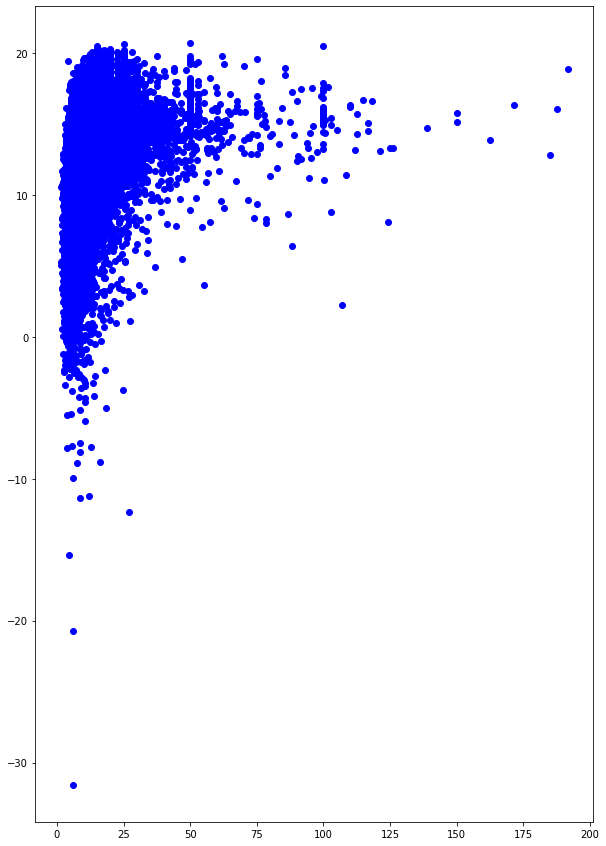

In [214]:
plt.scatter(y_test, y_pred,  color='blue')

plt.show()

In [161]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.830133215309995
Mean Squared Error: 66.67463689290196
Root Mean Squared Error: 8.16545386937566
R2: 0.11261885108173264


### KNN

In [216]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

from sklearn import linear_model
from sklearn.metrics import r2_score
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
# predictions  = lm.predict(X_test)
r2_score(y_test, predictions)


0.14683209071517256

## Bias over fitting

Text(0, 0.5, 'Accuracy')

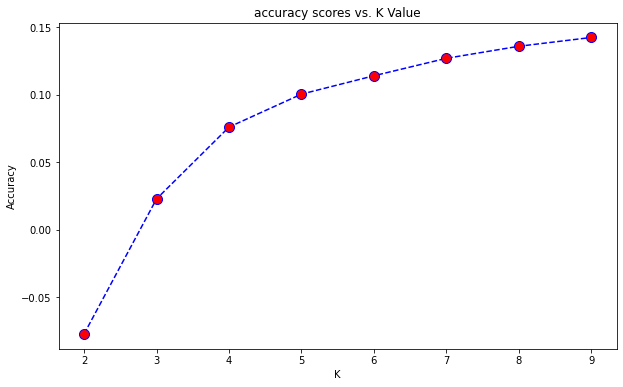

In [218]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))


plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
